In [1]:
import numpy as np
import osmnx as ox
import networkx as nx
import time

import seaborn as sns
import matplotlib.pyplot as plt

import random
import pickle, os
import glob
import mlrfit as mf
import lrrouting as ldr

/Users/parshakova.tanya/opt/anaconda3/envs/routing/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mtype = "manhattan"

place = "Manhattan, NY, USA"
G, Adj, Dist, nodes_cc = ldr.dist_matrix_osmnx(place, directed=True, nodes=True)

A = Dist
m = n = A.shape[0]
diam_G = A.max()
w_min = A[A>0].min()
print(m, diam_G, w_min, (Adj>0).sum())
print(f"{n=}")
print(np.histogram(Dist.flatten(), bins=5, density=True))

nsamples = int(np.sqrt(n))
info_ranks = {}

[4502, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
n_cc = 4502, n0 = 4585
in  degrees: {0: 0, 1: 636, 2: 2691, 3: 1020, 4: 154, 5: 1}
out degrees: {0: 0, 1: 645, 2: 2671, 3: 1033, 4: 152, 5: 1}
4502 84.0 1.0 9699
n=4502
(array([0.00531293, 0.02191651, 0.02312574, 0.00893974, 0.00022889]), array([ 0. , 16.8, 33.6, 50.4, 67.2, 84. ]))


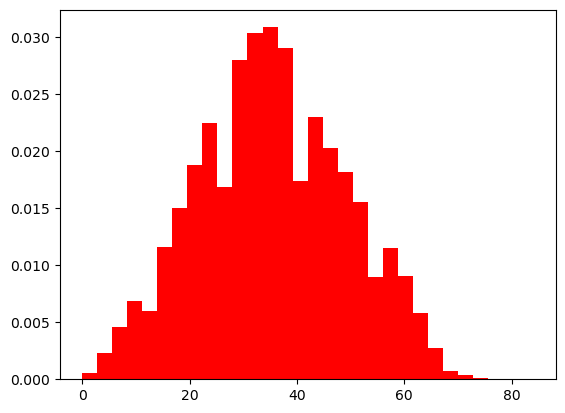

In [3]:
counts, bins = np.histogram(Dist, bins=30, density=True)
# plt.stairs(counts, bins)
plt.hist(bins[:-1], bins, weights=counts, color='r')
plt.show()

In [4]:
Dist.mean(), Dist.std(), Dist.min(), Dist.max()

(35.37892122973727, 13.769862038675653, 0.0, 84.0)

In [5]:
# fig, ax = ox.plot_graph(G, bgcolor="#ffffff", edge_color='k', edge_linewidth=0.2, node_color='k', node_size=2, figsize=(12, 12))

In [18]:
n = 4498

In [21]:
search_pattern = os.path.join("outputs/", f'{mtype}*{n}*.pickle')
matching_files = sorted(glob.glob(search_pattern))


for fname in matching_files:
    rank = int(fname.split("_")[2][4:])
    with open(fname, 'rb') as handle:
        info_ranks[rank] = pickle.load(handle)[rank]

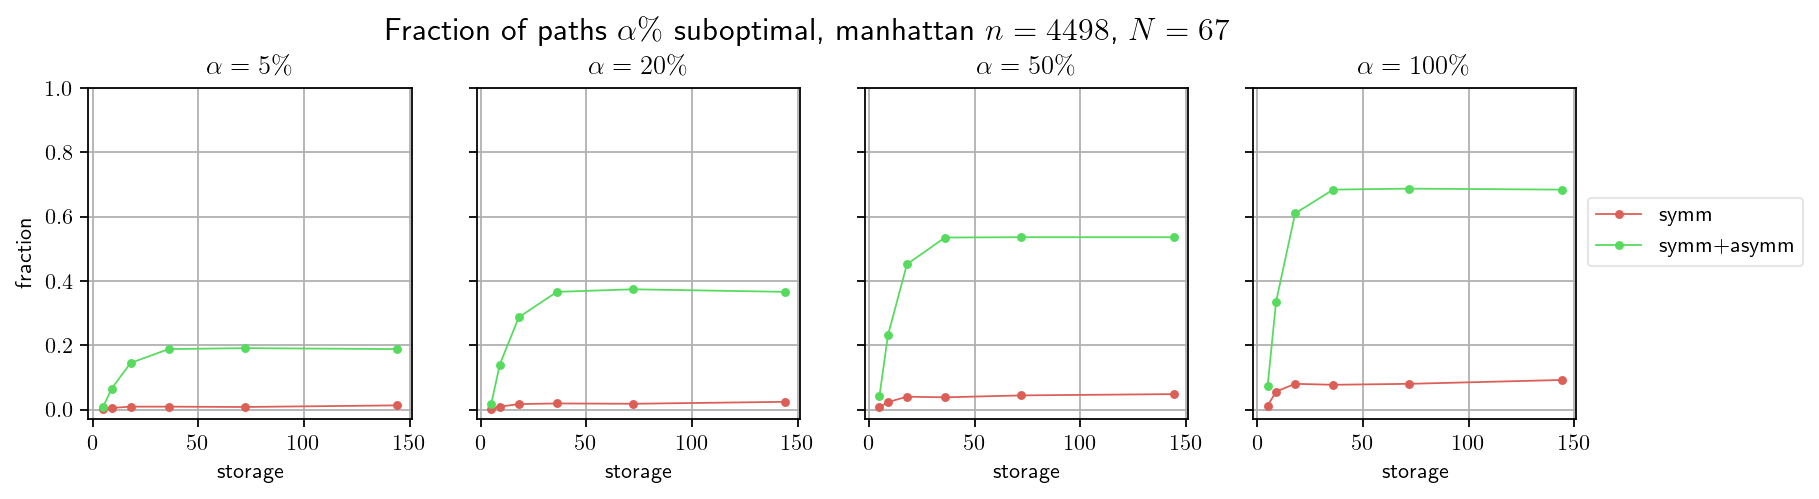

In [22]:
ldr.plot_fracs_subopt(info_ranks, list(info_ranks.keys()), fracs = [1.05, 1.2, 1.5, 2.0], dpi=160, figsize=(12, 3), 
                      marker='.', mtype=mtype+r" $n=%d$, $N=%d$"%(n, nsamples), ylim=[-3e-2, 1])

In [23]:
info_ranks.keys()

dict_keys([144, 18, 36, 5, 72, 9])

In [25]:
search_pattern = os.path.join("outputs/", f'*{mtype}*{n}*.pickle')
matching_files = sorted(glob.glob(search_pattern))


for fname in matching_files:
    if not "nsp10_" in fname: continue
    rank = int(fname.split("_")[-3][4:])
    with open(fname, 'rb') as handle:
        d1 = pickle.load(handle)[rank]
    # info_ranks[rank] = {"symm 1":d1["symm"], "symm+asymm 1":d1["symm+asymm"]}
    info_ranks[rank] = {r"$|I|/n=10\%$":d1["symm+asymm"]}
    for ns in [1, 100]:
        fname2 = fname.replace('nsp10', "nsp%d")%ns
        with open(fname2, 'rb') as handle:
            d2 = pickle.load(handle)[rank]
        # info_ranks[rank]["symm %d"%ns] = d2["symm"]
        info_ranks[rank][r"$|I|/n=%d\%%$"%(ns)] = d2["symm+asymm"]

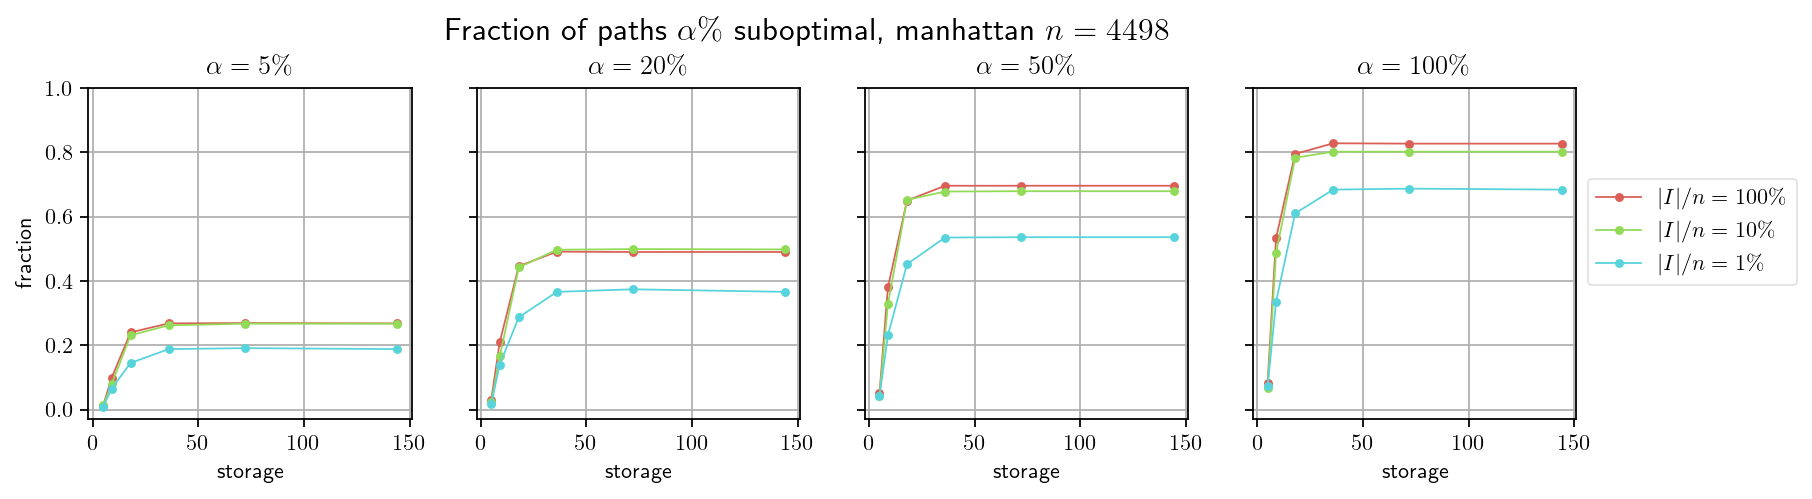

In [26]:
ldr.plot_fracs_subopt(info_ranks, list(info_ranks.keys()), fracs = [1.05, 1.2, 1.5, 2.0], dpi=160, figsize=(12, 3), 
                      marker='.', mtype=mtype+r" $n=%d$"%(n), ylim=[-3e-2, 1])

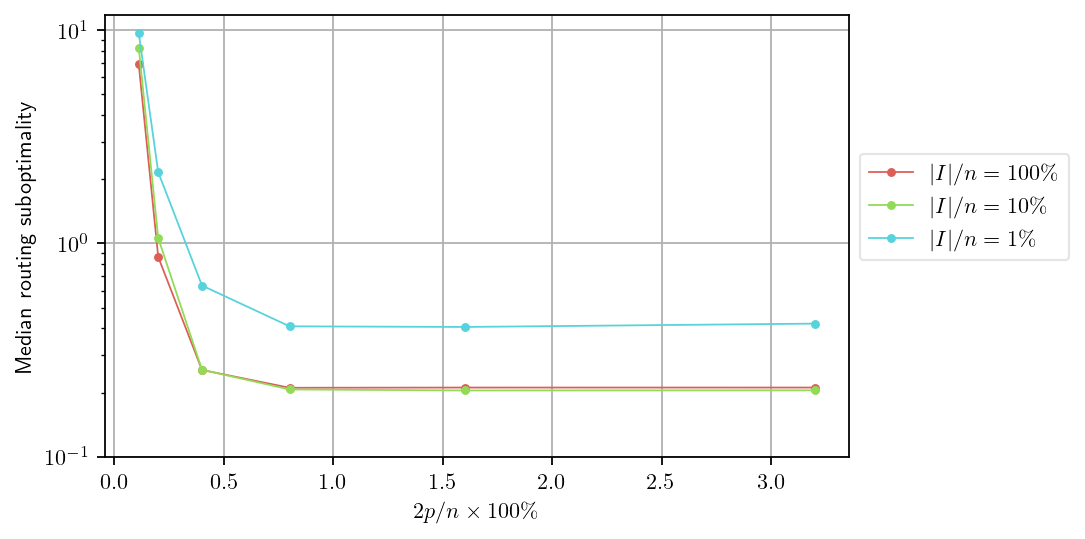

In [27]:
ldr.plot_median_storage(n, info_ranks, list(info_ranks.keys()), 
                      dpi=160, figsize=(6, 4), marker='.', 
                      mtype=mtype+r" $n=%d$"%(n), 
                      yticks=[1e-1, 1, 10])

In [50]:
r = list(info_ranks.keys())[0]
algos = sorted(info_ranks[r].keys())

ranks = np.array(sorted(info_ranks.keys()))

emb_rel_diff = {algo:[] for algo in algos}
for rank in ranks:
    rats = info_ranks[rank][r"$|I|/n=100\%$"]
    print(rank, np.round(rank / n  * 100, 1), np.median(rats["ratios"]))
    ldr.print_stats_moments(rats["r_rel_diff"])
    ldr.print_stats_moments(rats["c_rel_diff"])

5 0.1 7.919457735247208
mean=20.22, M=8.54, SD=63.60, q_25=3.47, q_75=17.81, max=4172.93, min=0.00
mean=20.22, M=8.54, SD=63.60, q_25=3.47, q_75=17.81, max=4172.93, min=0.00
9 0.2 1.8639705882352942
mean=10.72, M=5.78, SD=31.90, q_25=2.64, q_75=10.71, max=2960.21, min=0.00
mean=10.72, M=5.78, SD=31.90, q_25=2.64, q_75=10.71, max=2960.21, min=0.00
18 0.4 1.255110554860242
mean=6.93, M=3.39, SD=22.04, q_25=1.46, q_75=6.80, max=2549.20, min=0.00
mean=6.93, M=3.39, SD=22.04, q_25=1.46, q_75=6.80, max=2549.20, min=0.00
36 0.8 1.2105263157894737
mean=6.80, M=3.19, SD=22.04, q_25=1.32, q_75=6.57, max=2564.83, min=0.00
mean=6.80, M=3.19, SD=22.04, q_25=1.32, q_75=6.57, max=2564.83, min=0.00
72 1.6 1.2110323886639676
mean=6.80, M=3.19, SD=22.05, q_25=1.32, q_75=6.57, max=2564.44, min=0.00
mean=6.80, M=3.19, SD=22.05, q_25=1.32, q_75=6.57, max=2564.44, min=0.00
144 3.2 1.2110323886639676
mean=6.80, M=3.19, SD=22.05, q_25=1.32, q_75=6.57, max=2564.42, min=0.00
mean=6.80, M=3.19, SD=22.05, q_25=1.

In [47]:
np.round(ranks / n  * 100, 2)

array([0.11, 0.2 , 0.4 , 0.8 , 1.6 , 3.2 ])

In [49]:
r = list(info_ranks.keys())[0]
algos = sorted(info_ranks[r].keys())

ranks = np.array(sorted(info_ranks.keys()))

emb_rel_diff = {algo:[] for algo in algos}
for rank in ranks:
    rats = info_ranks[rank][r"$|I|/n=10\%$"]
    print(rank, np.round(rank / n  * 100, 1), np.median(rats["ratios"]))
    ldr.print_stats_moments(rats["r_rel_diff"])
    ldr.print_stats_moments(rats["c_rel_diff"])

5 0.1 9.284615384615385
mean=24.31, M=9.55, SD=75.70, q_25=4.29, q_75=21.06, max=3499.70, min=0.00
mean=21.61, M=9.14, SD=69.02, q_25=3.99, q_75=18.69, max=3610.10, min=0.00
9 0.2 2.0590277777777777
mean=10.46, M=5.32, SD=32.91, q_25=2.35, q_75=10.43, max=3234.52, min=0.00
mean=10.33, M=5.29, SD=33.58, q_25=2.36, q_75=10.21, max=2879.30, min=0.00
18 0.4 1.255656108597285
mean=6.97, M=3.34, SD=22.47, q_25=1.45, q_75=6.79, max=2209.08, min=0.00
mean=6.87, M=3.32, SD=22.63, q_25=1.47, q_75=6.69, max=1720.77, min=0.00
36 0.8 1.2067307692307692
mean=6.86, M=3.19, SD=22.44, q_25=1.32, q_75=6.58, max=2194.50, min=0.00
mean=6.73, M=3.10, SD=22.67, q_25=1.30, q_75=6.40, max=1747.84, min=0.00
72 1.6 1.2045454545454546
mean=6.85, M=3.19, SD=22.43, q_25=1.32, q_75=6.58, max=2194.37, min=0.00
mean=6.72, M=3.10, SD=22.66, q_25=1.30, q_75=6.40, max=1739.60, min=0.00
144 3.2 1.2048368298368297
mean=6.85, M=3.19, SD=22.43, q_25=1.32, q_75=6.58, max=2194.45, min=0.00
mean=6.72, M=3.10, SD=22.66, q_25=1.

In [51]:
(3.19 + 3.1)/2

3.145

In [44]:
r = list(info_ranks.keys())[0]
algos = sorted(info_ranks[r].keys())

ranks = np.array(sorted(info_ranks.keys()))

emb_rel_diff = {algo:[] for algo in algos}
for rank in ranks:
    rats = info_ranks[rank][r"$|I|/n=1\%$"]
    print(rank, np.round(rank / n  * 100, 3), np.median(rats["ratios"]))
    ldr.print_stats_moments(rats["r_rel_diff"])
    ldr.print_stats_moments(rats["c_rel_diff"])

5 0.111 10.690314769975787
mean=24.70, M=10.73, SD=77.91, q_25=4.76, q_75=20.30, max=3253.83, min=0.00
mean=22.36, M=9.13, SD=72.16, q_25=3.94, q_75=18.94, max=4066.63, min=0.00
9 0.2 3.1570723684210527
mean=10.02, M=5.07, SD=31.23, q_25=2.28, q_75=9.81, max=1873.12, min=0.00
mean=9.85, M=5.03, SD=29.98, q_25=2.30, q_75=9.50, max=2023.35, min=0.00
18 0.4 1.6345334881920248
mean=6.20, M=2.94, SD=20.33, q_25=1.28, q_75=6.04, max=1427.10, min=0.00
mean=6.07, M=2.89, SD=19.20, q_25=1.21, q_75=5.90, max=1427.47, min=0.00
36 0.8 1.4085850556438793
mean=6.03, M=2.64, SD=20.26, q_25=1.11, q_75=5.73, max=1443.01, min=0.00
mean=5.92, M=2.62, SD=19.20, q_25=1.04, q_75=5.60, max=1438.06, min=0.00
72 1.599 1.4058823529411764
mean=6.03, M=2.64, SD=20.26, q_25=1.11, q_75=5.73, max=1442.98, min=0.00
mean=5.92, M=2.62, SD=19.21, q_25=1.04, q_75=5.60, max=1439.32, min=0.00
144 3.199 1.4207885304659498
mean=6.03, M=2.64, SD=20.26, q_25=1.11, q_75=5.72, max=1442.98, min=0.00
mean=5.92, M=2.62, SD=19.20, q

In [ ]:
assert 1 == 0

In [33]:
[r/n for r in info_ranks.keys()]

[0.03201422854602046,
 0.004001778568252557,
 0.008003557136505114,
 0.0011116051578479323,
 0.01600711427301023,
 0.0020008892841262785]

In [35]:
n=4502

adjacency_list = ldr.adjacency_directed_list(Adj)
sources, targets = ldr.st_pairs(n, Dist, 1020)

rand_frac = 0.975
coeff = 10
print(f"{rand_frac=}")
pi_rows, pi_cols = ldr.adaptive_row_col(n, Dist, frac=rand_frac, coeff=coeff, percent=True)
rDist, cDist, pi_rows_c, pi_cols_c = ldr.sample_dist(n, pi_rows, pi_cols, Dist)

nsamples = pi_rows.size

rank = 9

rand_frac=0.975
nsamples=450, random_samples=438


In [36]:
print(f"\n{rank=}")
lr_dar, _, Z = ldr.dar_fast_cc(rank, pi_rows, pi_cols, pi_rows_c, pi_cols_c, rDist, cDist, adjacency_list, sources, targets, 
                           Dist, cc_max_iter=1000, n_init_cc=2, cg_eps=1e-8, cg_max_iter=200, verbose=True, freq=500)


rank=9


Symmetric rank/2=4.5


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/parshakova.tanya/Documents/projects/lr_distributed_routing/lrrouting/cg.py:48: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, C))
  rho0 = np.dot(r, z)
/Users/parshakova.tanya/Documents/projects/lr_distributed_routing/lrrouting/cg.py:72: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  losses[k] = np.sqrt(np.dot(r, r)) / b_norm


t=0, loss=2514.2938318629517
t=500, loss=26.5903500200621
loss=23.863242838530418, np.diff(np.array(losses)).max()=-0.002463039248596033
t=0, loss=2511.327648816909
t=500, loss=23.319886949223015
loss=21.19494939025221, np.diff(np.array(losses)).max()=-0.0008176093417233687
time=470.63, losses[0]=2511.33, losses[-1]=21.19, len(losses)=1000
Garbage collector: collected 38017 objects.

Split -> asymmetric fit rank=9
t=0, loss=41.269687378107726
398
loss=17.110993571082524, np.diff(np.array(losses)).max()=0.0
time=155.52, losses[0]=41.27, losses[-1]=0.00, len(losses)=399
Garbage collector: collected 39657 objects.
$\|x_i-y_j\|_2$
median_stretch=222.7%, mean_stretch=424.4%
%[ratio<2] = 45.78%, %[ratio<1.2] = 17.35%, %[ratio=1.] = 6.27%
Garbage collector: collected 0 objects.


In [37]:
r_rel_diff, c_rel_diff = ldr.relative_average_difference(n, Z, pi_rows, pi_cols, rDist, cDist, bins=250)

rows: m=10.27%, SD=31.97%, M=5.34%, max=2600.58%
cols: m=10.59%, SD=34.17%, M=5.35%, max=3348.74%


# Route plotting

In [39]:
s = 1072; t = 1670
route_lr, w_lr = lr_dar.route(s, t)
ldr.valid_path(route_lr, w_lr, adjacency_list, s, t)

True

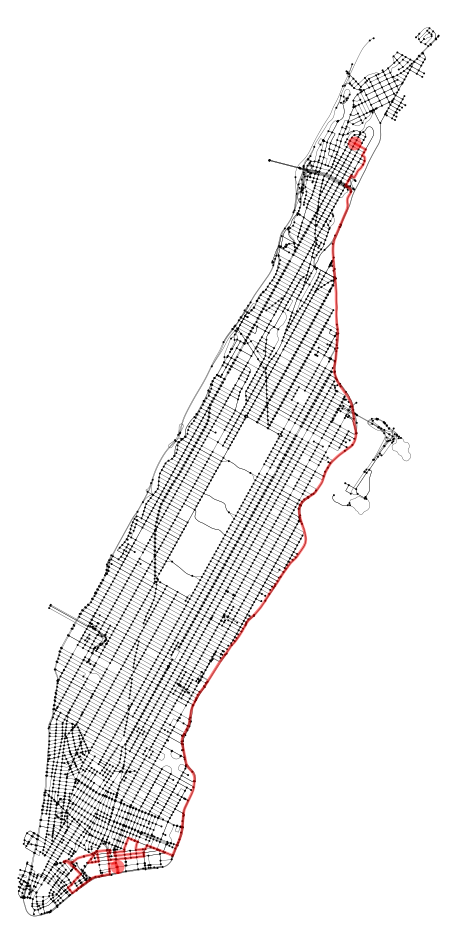

In [40]:
node_ids = list(G.nodes())
routes = [ldr.map_to_node_ids(route_lr, node_ids, nodes_cc)]
rc = ['c', 'y', 'r']

fig, ax = ox.plot_graph_route(G, routes[-1], route_color='r', bgcolor="#ffffff", \
                                edge_color='k', edge_linewidth=0.2, node_color='k', route_linewidth=2, node_size=2, figsize=(12, 12))

fig.savefig(f"plots/{mtype}_r{rank}.pdf", bbox_inches='tight')
plt.show()

In [42]:
rank / n

0.0019991115059973343